# Unit 5 - Financial Planning

In [33]:
# Initial imports
import os
import json
import requests
import numpy as np
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [34]:
# Load .env enviroment variables

load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [35]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3


In [36]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [37]:
def get_crypto_price_data(coin):
    # Define the API URL with a placeholder for the coin symbol
    url = f"https://api.alternative.me/v2/ticker/{coin}/?convert=USD"
    
    # Send a GET request to the API URL
    response = requests.get(url)

    # Extract the JSON data from the response
    data = response.json()

    #print(f"data = {data}" )
    # Get the price data for the specified cryptocurrency
    
    
    price_data = data['data'][str(data['data'].keys())[12:-3]]['quotes']['USD']

    # Create a pandas dataframe from the price data
    df = pd.DataFrame(price_data, index=[coin.capitalize()])

    # Return the dataframe
    return df


In [38]:
# Compute current value of my crpto
def computeValue(df, coinQuant):
    
    value = 0
    value = df['price'] * coinQuant
    return value

In [39]:
# Fetch current BTC price
# Call the function to retrieve Bitcoin price data
btc_data = get_crypto_price_data("Bitcoin")

# Fetch current ETH price
eth_data = get_crypto_price_data("Ethereum")

btc_df = pd.DataFrame(btc_data)
eth_df = pd.DataFrame(eth_data)

# Print the dataframe for eth and btc
print(f"btc_data = {btc_df.head()}\n")
print(f"btc_data = {eth_df.head()}\n")

# Print current crypto wallet balance
# the below code is using the computeValue function to compute the value of the crypto
btc_value = computeValue(btc_df, my_btc)
print(f"btc value = {btc_value}\n")

eth_value = computeValue(eth_df, my_eth)
print(f"eth value = {eth_value}\n")

print(type(eth_value))

btc_data =            price   volume_24h    market_cap  percentage_change_1h  \
Bitcoin  30294.0  17938153316  585915840390               0.27811   

         percentage_change_24h  percentage_change_7d  percent_change_1h  \
Bitcoin               2.486353              0.110056            0.27811   

         percent_change_24h  percent_change_7d  
Bitcoin            2.486353           0.110056  

btc_data =             price  volume_24h    market_cap  percentage_change_1h  \
Ethereum  2090.79  9817690617  249420844861              0.217266   

          percentage_change_24h  percentage_change_7d  percent_change_1h  \
Ethereum               0.002428              10.45195           0.217266   

          percent_change_24h  percent_change_7d  
Ethereum            0.002428           10.45195  

btc value = Bitcoin    36352.8
Name: price, dtype: float64

eth value = Ethereum    11081.187
Name: price, dtype: float64

<class 'pandas.core.series.Series'>


In [40]:
#btc_data.head()


In [41]:
#btc_data.dtypes

In [42]:
#btc_data.describe()

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [43]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [44]:
# Set Alpaca API key and secret
# YOUR CODE HERE!

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!

alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")


In [45]:
# Format current date as ISO format
# YOUR CODE HERE!

start = pd.Timestamp("2019-01-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2022-01-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG

df_ticker = alpaca.get_bars(tickers, timeframe, start=start, end=end).df
df_ticker.head()
df_ticker.tail()

# Pick AGG and SPY close prices

AGG = df_ticker[df_ticker["symbol"] == 'AGG'].drop("symbol", axis=1)
SPY = df_ticker[df_ticker["symbol"] == 'SPY'].drop("symbol", axis=1)

# Print AGG and SPY close prices and drop the time component of the date

df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])


# Preview DataFrame
# YOUR CODE HERE!
display(df_ticker.head())

AGG                                       \
                             open     high       low   close    volume   
timestamp                                                                
2019-01-02 05:00:00+00:00  106.55  106.610  106.4701  106.57  11201567   
2019-01-03 05:00:00+00:00  106.57  107.075  106.5700  107.01   6497397   
2019-01-04 05:00:00+00:00  106.66  106.720  106.5500  106.69   8148986   
2019-01-07 05:00:00+00:00  106.72  106.790  106.4600  106.51   7433691   
2019-01-08 05:00:00+00:00  106.40  106.530  106.3800  106.43   4395611   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2019-01-02 05:00:00+00:00       27948  106.542414  245.98  251.21  245.95   
2019-01-03 05:00:00+00:00       20215  106.933776  248.23  248.57  243.67   
2019-01-04 05:00:00+00:00       19547  106.639485  247.59  253.11  247.17   
2019-01-07 05:00:00+00:00       23935  106.588915  252.70  255.95  251.69   
2019-01-08 05:00:00+00:00       15476  106.448262  256.82  257.31  254.00   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2019-01-02 05:00:00+00:00  250.23  131471311      603608  249.117597  
2019-01-03 05:00:00+00:00  244.15  146803492      698037  245.630362  
2019-01-04 05:00:00+00:00  252.39  142920211      708777  250.455694  
2019-01-07 05:00:00+00:00  254.29  103705813      449998  254.069565  
2019-01-08 05:00:00+00:00  256.62  103267687      461977  255.845300

In [46]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

agg_close_price = df_ticker['AGG']['close'].iloc[-1]
spy_close_price = df_ticker['SPY']['close'].iloc[-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.08
Current SPY closing price: $474.96


In [47]:
# Compute the current value of shares using the most recent closing price
# YOUR CODE HERE!

my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23748.00
The current value of your 200 AGG shares is $22816.00


### Savings Health Analysis

In [48]:
# Set monthly household income
# YOUR CODE HERE!

monthly_household_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
#To analyze savings health, create a DataFrame called df_savings with two rows. Store the total value in dollars of the crypto assets in the first row and the total value of the shares in the second row.

# doing this by adding the values of the crypto and shares
shares_value = my_spy_value + my_agg_value
crypto_value = btc_value[0] + eth_value[0]




print(f"crypto_value = {crypto_value}\n")

#create the dictionary to store the values ; used for creating the dataframe
saving_data = {
    "Crypto": [crypto_value],
    "Shares": [shares_value]
}

# Create savings DataFrame
saving_df = pd.DataFrame(saving_data, index=["Amount"])
saving_df_transposed = saving_df.T
saving_df_transposed.columns = ["Amount"]


# Display savings DataFrame

display(saving_df_transposed)

crypto_value = 47433.986999999994



,Amount
Crypto,47433.987
Shares,46564.000


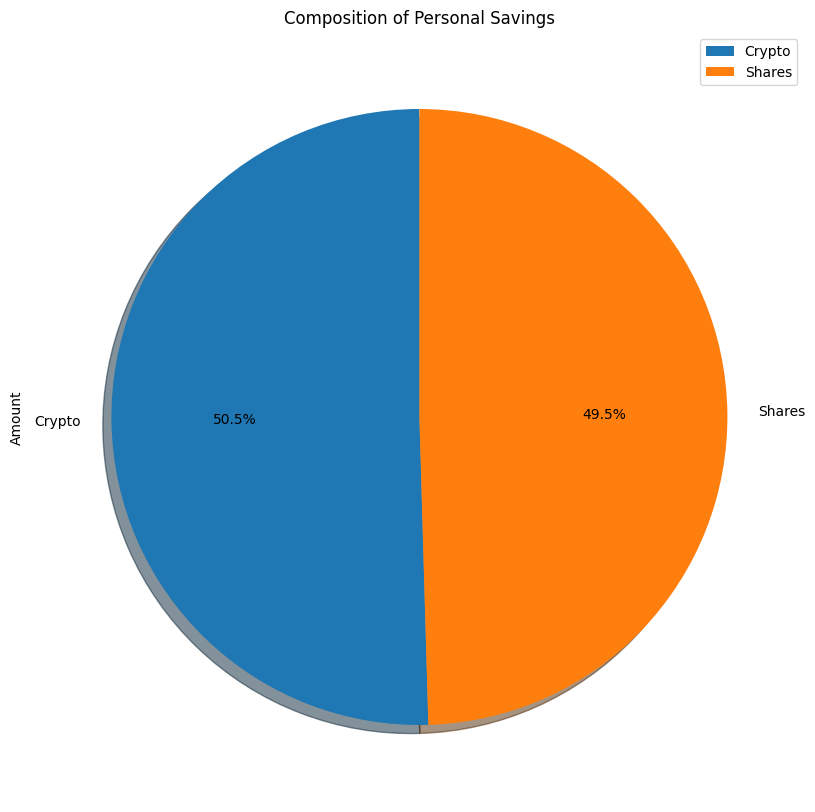

In [49]:
# Plot savings pie chart
# YOUR CODE HERE!

savings_plot = saving_df_transposed.plot.pie(y="Amount", title="Composition of Personal Savings", figsize=(10,10), autopct='%1.1f%%', shadow=True, startangle=90)

In [50]:
# Set ideal emergency fund
emergency_fund = monthly_household_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!

total_savings = saving_df_transposed.sum()


# Validate saving health
# YOUR CODE HERE!

if(total_savings[0] > emergency_fund):
    print("Congratulations! You have enough money in your emergency fund.")
elif(total_savings[0] == emergency_fund):
    print("Congratulations! You have reached your financial goal.")
else:
    print(f"You are ${emergency_fund - total_savings[0]} away from reaching your financial goal.")


Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [51]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen

start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [52]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
ticker_df = alpaca.get_bars(tickers, timeframe, start=start_date, end=end_date).df
ticker_df.tail()
# Reorganize the DataFrame
# Separate ticker data
##@NOTE: REFER TO THREE STOCK MONTI CARLO SIMULATION FOR THIS CODE

SPY = ticker_df[ticker_df["symbol"] == 'SPY'].drop("symbol", axis=1)
AGG = ticker_df[ticker_df["symbol"] == 'AGG'].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!

df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [68]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_40_60_dist = MCSimulation(
    
    portfolio_data=df_ticker,
    weights=[0.40, 0.60],
    num_simulation=500,
    num_trading_days=252*30
)


# Print the simulation input data
MC_40_60_dist.portfolio_data.head()


AGG                                       \
                             open     high       low   close    volume   
timestamp                                                                
2019-01-02 05:00:00+00:00  106.55  106.610  106.4701  106.57  11201567   
2019-01-03 05:00:00+00:00  106.57  107.075  106.5700  107.01   6497397   
2019-01-04 05:00:00+00:00  106.66  106.720  106.5500  106.69   8148986   
2019-01-07 05:00:00+00:00  106.72  106.790  106.4600  106.51   7433691   
2019-01-08 05:00:00+00:00  106.40  106.530  106.3800  106.43   4395611   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-01-02 05:00:00+00:00       27948  106.542414          NaN  245.98   
2019-01-03 05:00:00+00:00       20215  106.933776     0.004129  248.23   
2019-01-04 05:00:00+00:00       19547  106.639485    -0.002990  247.59   
2019-01-07 05:00:00+00:00       23935  106.588915    -0.001687  252.70   
2019-01-08 05:00:00+00:00       15476  106.448262    -0.000751  256.82   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2019-01-02 05:00:00+00:00  251.21  245.95  250.23  131471311      603608   
2019-01-03 05:00:00+00:00  248.57  243.67  244.15  146803492      698037   
2019-01-04 05:00:00+00:00  253.11  247.17  252.39  142920211      708777   
2019-01-07 05:00:00+00:00  255.95  251.69  254.29  103705813      449998   
2019-01-08 05:00:00+00:00  257.31  254.00  256.62  103267687      461977   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-01-02 05:00:00+00:00  249.117597          NaN  
2019-01-03 05:00:00+00:00  245.630362    -0.024298  
2019-01-04 05:00:00+00:00  250.455694     0.033750  
2019-01-07 05:00:00+00:00  254.069565     0.007528  
2019-01-08 05:00:00+00:00  255.845300     0.009163

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\john\_FinTech\myHomework\Homework5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

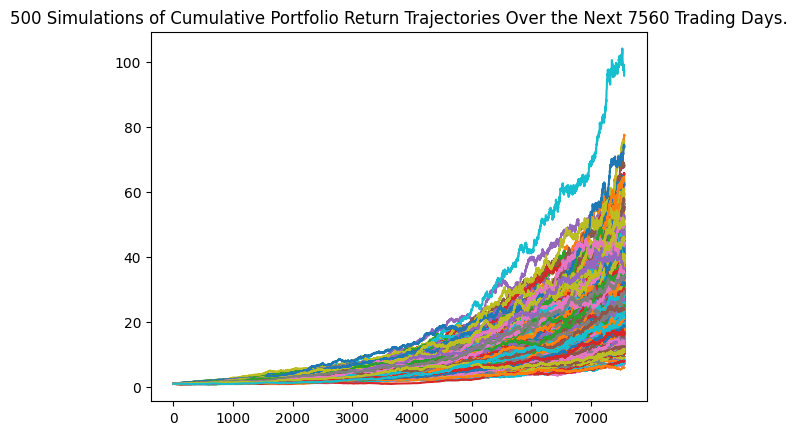

In [69]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MCSimulation.plot_simulation(MC_40_60_dist)

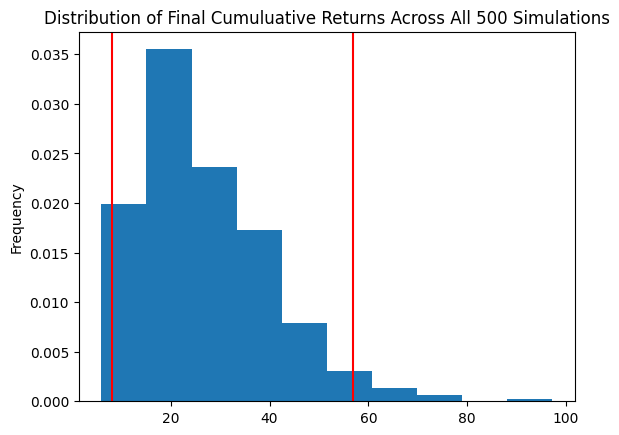

In [72]:
# Plot probability distribution and confidence intervals
dist_plot = MC_40_60_dist.plot_distribution()

### Retirement Analysis

In [73]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
MC_40_60_tbl = MC_40_60_dist.summarize_cumulative_return()


# Print summary statistics
# YOUR CODE HERE!

print(MC_40_60_tbl)

count           500.000000
mean             26.773775
std              13.055210
min               5.948624
25%              17.609373
50%              24.110305
75%              34.365005
max              97.228517
95% CI Lower      8.120531
95% CI Upper     56.815856
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [74]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(MC_40_60_tbl[8]*initial_investment,2)
ci_upper = round(MC_40_60_tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $162410.62 and $1136317.12


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [75]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(MC_40_60_tbl[8]*initial_investment,2)
ci_upper = round(MC_40_60_tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $243615.93 and $1704475.68


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [76]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
#[AGG,SPY][70,30]
# YOUR CODE HERE!
MC_OP1_dist = MCSimulation(
    
    portfolio_data=df_ticker,
    weights=[0.70, 0.30],
    num_simulation=500,
    num_trading_days=252*5
)


# Print the simulation input data
MC_OP1_dist.portfolio_data.head()

AGG                                       \
                             open     high       low   close    volume   
timestamp                                                                
2019-01-02 05:00:00+00:00  106.55  106.610  106.4701  106.57  11201567   
2019-01-03 05:00:00+00:00  106.57  107.075  106.5700  107.01   6497397   
2019-01-04 05:00:00+00:00  106.66  106.720  106.5500  106.69   8148986   
2019-01-07 05:00:00+00:00  106.72  106.790  106.4600  106.51   7433691   
2019-01-08 05:00:00+00:00  106.40  106.530  106.3800  106.43   4395611   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-01-02 05:00:00+00:00       27948  106.542414          NaN  245.98   
2019-01-03 05:00:00+00:00       20215  106.933776     0.004129  248.23   
2019-01-04 05:00:00+00:00       19547  106.639485    -0.002990  247.59   
2019-01-07 05:00:00+00:00       23935  106.588915    -0.001687  252.70   
2019-01-08 05:00:00+00:00       15476  106.448262    -0.000751  256.82   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2019-01-02 05:00:00+00:00  251.21  245.95  250.23  131471311      603608   
2019-01-03 05:00:00+00:00  248.57  243.67  244.15  146803492      698037   
2019-01-04 05:00:00+00:00  253.11  247.17  252.39  142920211      708777   
2019-01-07 05:00:00+00:00  255.95  251.69  254.29  103705813      449998   
2019-01-08 05:00:00+00:00  257.31  254.00  256.62  103267687      461977   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-01-02 05:00:00+00:00  249.117597          NaN  
2019-01-03 05:00:00+00:00  245.630362    -0.024298  
2019-01-04 05:00:00+00:00  250.455694     0.033750  
2019-01-07 05:00:00+00:00  254.069565     0.007528  
2019-01-08 05:00:00+00:00  255.845300     0.009163

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\john\_FinTech\myHomework\Homework5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

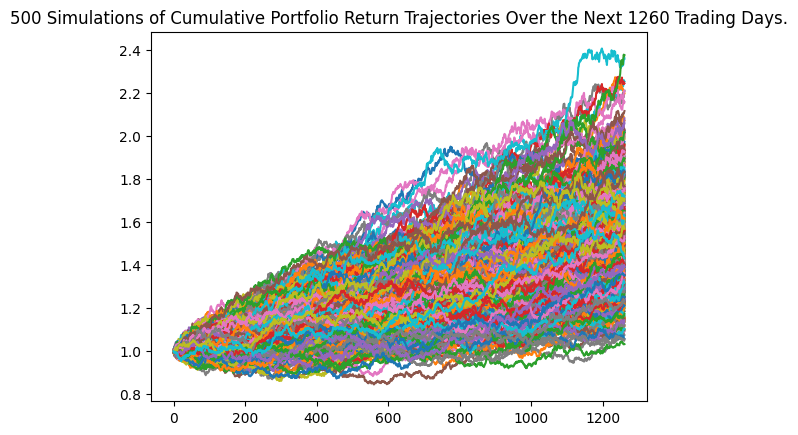

In [77]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MCSimulation.plot_simulation(MC_OP1_dist)

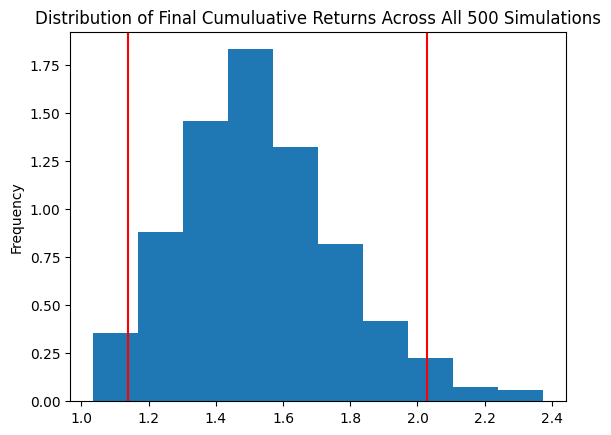

In [80]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_OP1_dist.plot_distribution()


In [81]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
OP1_tbl = MC_OP1_dist.summarize_cumulative_return()

print(OP1_tbl)


count           500.000000
mean              1.533390
std               0.237459
min               1.033270
25%               1.369391
50%               1.509861
75%               1.655556
max               2.374958
95% CI Lower      1.138721
95% CI Upper      2.028374
Name: 1260, dtype: float64


In [83]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

ci_lower_five = round(OP1_tbl[8]*initial_investment,2)
ci_upper_five = round(OP1_tbl[9]*initial_investment,2)
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $68323.28 and $121702.44


### Ten Years Retirement Option

In [84]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_OP2_dist = MCSimulation(
    
    portfolio_data=df_ticker,
    weights=[0.70, 0.30],
    num_simulation=500,
    num_trading_days=252*5
)


# Print the simulation input data
MC_OP1_dist.portfolio_data.head()

AGG                                       \
                             open     high       low   close    volume   
timestamp                                                                
2019-01-02 05:00:00+00:00  106.55  106.610  106.4701  106.57  11201567   
2019-01-03 05:00:00+00:00  106.57  107.075  106.5700  107.01   6497397   
2019-01-04 05:00:00+00:00  106.66  106.720  106.5500  106.69   8148986   
2019-01-07 05:00:00+00:00  106.72  106.790  106.4600  106.51   7433691   
2019-01-08 05:00:00+00:00  106.40  106.530  106.3800  106.43   4395611   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-01-02 05:00:00+00:00       27948  106.542414          NaN  245.98   
2019-01-03 05:00:00+00:00       20215  106.933776     0.004129  248.23   
2019-01-04 05:00:00+00:00       19547  106.639485    -0.002990  247.59   
2019-01-07 05:00:00+00:00       23935  106.588915    -0.001687  252.70   
2019-01-08 05:00:00+00:00       15476  106.448262    -0.000751  256.82   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2019-01-02 05:00:00+00:00  251.21  245.95  250.23  131471311      603608   
2019-01-03 05:00:00+00:00  248.57  243.67  244.15  146803492      698037   
2019-01-04 05:00:00+00:00  253.11  247.17  252.39  142920211      708777   
2019-01-07 05:00:00+00:00  255.95  251.69  254.29  103705813      449998   
2019-01-08 05:00:00+00:00  257.31  254.00  256.62  103267687      461977   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-01-02 05:00:00+00:00  249.117597          NaN  
2019-01-03 05:00:00+00:00  245.630362    -0.024298  
2019-01-04 05:00:00+00:00  250.455694     0.033750  
2019-01-07 05:00:00+00:00  254.069565     0.007528  
2019-01-08 05:00:00+00:00  255.845300     0.009163

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\john\_FinTech\myHomework\Homework5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

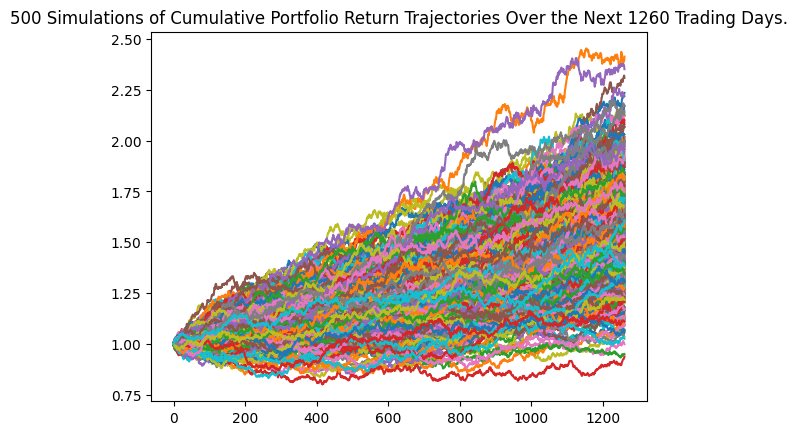

In [85]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MCSimulation.plot_simulation(MC_OP2_dist)

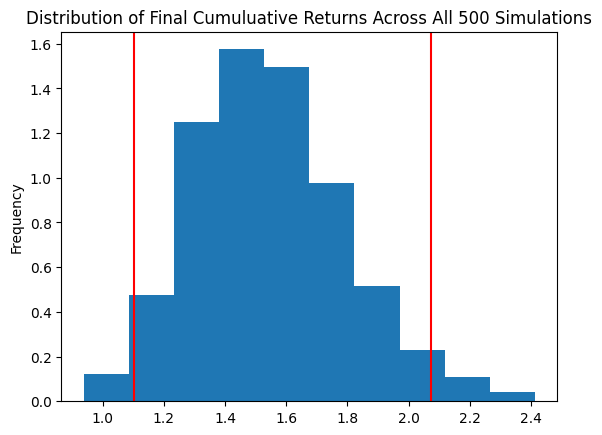

In [86]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot = MC_OP2_dist.plot_distribution()

In [87]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
OPT2_tbl = MC_OP2_dist.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(OPT2_tbl)

count           500.000000
mean              1.542837
std               0.248661
min               0.939020
25%               1.370399
50%               1.526107
75%               1.694912
max               2.412187
95% CI Lower      1.104065
95% CI Upper      2.074330
Name: 1260, dtype: float64


In [88]:
# Set initial investment
# YOUR CODE HERE!
ci_lower_ten = round(OPT2_tbl[8]*initial_investment,2)
ci_upper_ten = round(OPT2_tbl[9]*initial_investment,2)
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $66243.92 and $124459.78


In [ ]:
# check if eth_value is a Pandas DataFrame, a NumPy array, a Python dictionary, or a JSON object
if isinstance(eth_value, pd.DataFrame):
    print("eth_value is a Pandas DataFrame")
elif isinstance(eth_value, np.ndarray):
    print("eth_value is a NumPy array")
elif isinstance(eth_value, dict):
    print("eth_value is a Python dictionary")
elif isinstance(eth_value, pd.Series):
    print("eth_value is a Pandas Series object")
elif isinstance(eth_value, str):
    try:
        eth_value_json = json.loads(eth_value)
        if isinstance(eth_value_json, dict):
            print("eth_value is a JSON object")
        else:
            print("eth_value is a string but not a valid JSON object")
    except json.JSONDecodeError:
        print("eth_value is a string but not a valid JSON object")
else:
    print("eth_value is neither a Pandas DataFrame, a NumPy array, a Python dictionary, nor a JSON object")


print('\n')
print(dir(eth_value))
print('\n')
print(type(eth_value))